### i) Preparation

In [1]:
!pip install keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train_labels), (X_test, y_test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [5]:
X_train.shape, X_test.shape


((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train_labels.shape

(60000,)

Label is 4


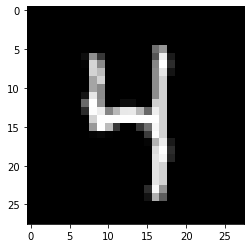

In [7]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [8]:
X_train.min(), X_train.max()

(0, 255)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [10]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### ii) model

In [11]:
from keras.layers import Dense
from keras.models import Sequential

In [12]:
# Увеличим вдвое кол-во слоёв и поменяем число нейронов в остальных
model = Sequential([
    Dense(60, input_shape=(28 * 28,), activation='relu'),
    Dense(53, activation='tanh'), # поменяли функцию активации
    Dense(41, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(27, activation='relu'),
    Dense(10, activation='sigmoid')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                47100     
                                                                 
 dense_1 (Dense)             (None, 53)                3233      
                                                                 
 dense_2 (Dense)             (None, 41)                2214      
                                                                 
 dense_3 (Dense)             (None, 32)                1344      
                                                                 
 dense_4 (Dense)             (None, 27)                891       
                                                                 
 dense_5 (Dense)             (None, 10)                280       
                                                                 
Total params: 55,062
Trainable params: 55,062
Non-traina

### iii) Transfer to learning

In [14]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [15]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [16]:
story = model.fit(X_train, y_train,
                    epochs=10,          # увеличим число эпох
                    batch_size=200,     # уменьшим batch_size
                    verbose=1,
                    validation_split=0.2)

Epoch 1/10
240/240 [==============================] - 2s 5ms/step - loss: 0.6061 - accuracy: 0.8248 - val_loss: 0.1969 - val_accuracy: 0.9451
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1712 - accuracy: 0.9493 - val_loss: 0.1499 - val_accuracy: 0.9563
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1187 - accuracy: 0.9647 - val_loss: 0.1300 - val_accuracy: 0.9616
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0929 - accuracy: 0.9716 - val_loss: 0.1167 - val_accuracy: 0.9649
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0742 - accuracy: 0.9783 - val_loss: 0.1111 - val_accuracy: 0.9660
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.1077 - val_accuracy: 0.9682
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.1057 - val_accuracy: 0.9681
Epoch 

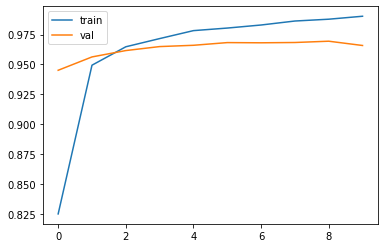

In [17]:
train_acc = story.history['accuracy']
val_acc = story.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

In [18]:
loss, metric = model.evaluate(X_test, y_test, batch_size=200)
loss, metric

50/50 [==============================] - 0s 2ms/step - loss: 0.1205 - accuracy: 0.9681


(0.12047264724969864, 0.9681000113487244)

### iv) start neural network

In [19]:
X_test[0][None].shape

(1, 784)

In [20]:
predictions = model.predict(X_test[16][None])
predictions

1/1 [==============================] - 0s 162ms/step


array([[4.3871838e-01, 7.5068615e-02, 4.2886906e-03, 2.9780632e-01,
        8.4502906e-01, 1.9753966e-02, 4.1870464e-04, 8.6857653e-01,
        9.3025845e-01, 9.9998158e-01]], dtype=float32)

In [21]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([9], dtype=int64)

In [22]:
y_test_labels[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

## Выводы

На показатели качества  сильно влияют количество эпох (чем большеб тем точнее) и
количество слоёв нейронной сети. Кроме этого результат зависит и от количества 
нейронов в слоях. В меньшей мере влияют такие показатели как batch_size (как
правило чем меньше, тем лучше) и функция активации. Нужно отметить что свой вклад привносит выбор оптимайзера.